In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
# 지도 시각화
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine, Unit
#dbf
from dbfread import DBF
import seaborn as sns

In [ ]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## 보육원

In [ ]:
child = pd.read_excel("data/서울시 보육원.xlsx")
child.head(5)

,연번,자치구,시설유형,시설명,아동현황(명),소재지,위도,경도
0,1.0,종로구,양육시설,선덕원,47.0,종로구 세검정로 7가길 15-141,37.601670,126.950861
1,2.0,중구,양육시설,남산원,45.0,중구 소파로2길 31,37.601670,126.950861
2,3.0,중구,양육시설,리라아동복지관,32.0,경기도 안성시 원곡면 용소길 65,NaN,NaN
3,4.0,용산구,양육시설,영락보린원,55.0,용산구 후암로 4길 70,37.485192,127.002220
4,5.0,용산구,양육시설,혜심원,56.0,용산구 소월로 2나길 18,37.553414,126.969173


In [ ]:
child = child.dropna()
child.head(5)

,연번,자치구,시설유형,시설명,아동현황(명),소재지,위도,경도
0,1.0,종로구,양육시설,선덕원,47.0,종로구 세검정로 7가길 15-141,37.601670,126.950861
1,2.0,중구,양육시설,남산원,45.0,중구 소파로2길 31,37.601670,126.950861
3,4.0,용산구,양육시설,영락보린원,55.0,용산구 후암로 4길 70,37.485192,127.002220
4,5.0,용산구,양육시설,혜심원,56.0,용산구 소월로 2나길 18,37.553414,126.969173
5,6.0,성동구,양육시설,이든아이빌,50.0,성동구 왕십리로 21라길 11,37.560546,127.022122


In [ ]:
child_xy = child[["위도", "경도"]]
child_xy.head(5)

,위도,경도
0,37.601670,126.950861
1,37.601670,126.950861
3,37.485192,127.002220
4,37.553414,126.969173
5,37.560546,127.022122


In [ ]:
g_map = g.Map(location =[37.60167,126.950861],zoom_start = 12)

In [ ]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for item in child.index:
    lat = child.loc[item, '위도']
    long = child.loc[item, '경도']
    g.Marker([lat, long],
                        fill = True).add_to(g_map)
g_map

## 버스 정류장 / 보건시설

In [ ]:
from dbfread import DBF
bus = DBF('data/bus/TB_E_BUSSTOP_2019.dbf')
bus = pd.DataFrame(bus)

TBVIATR = DBF("data/집객시설/TL_TBVIATR_FCLTY_INFO_2019.dbf")
TBVIATR = pd.DataFrame(TBVIATR)

In [ ]:
#병원 데이터가 어디 들어가는지 확인 -> 보건시설 !!
TBVIATR['MLSFCDC'].value_counts()

교육시설        6616
보건시설        6552
서비스산업       2869
숙박시설        2485
문화/예술시설      525
지방행정기관       460
정치/사회/외교     117
교통시설         108
중앙행정기관        50
Name: MLSFCDC, dtype: int64

In [ ]:
health = TBVIATR[TBVIATR['MLSFCDC'].str.contains('보건시설', na=False)].reset_index(drop=True)
health.head(5)

,STDR_YM,VIAT_SE_CD,VIAT_CD,VIAT_ID,LCLASDC,MLSFCDC,SCLASDC,DCLASDC,BCLASDC,VIAT_NM,ADRES_CD,ADRES_NM,TELNO,X_VALUE,Y_VALUE,ADRES_SP,BLCK_CD,REGIST_DE,ERSR_DE,REGIST_DT
0,,30205,0102,AA0000000008102,교육/보건,보건시설,기타보건시설,약국,메디팜,(주)그린메디팜,,,,202921.6973,553258.6720,,,,,
1,,30204,0000,AA00000000410,교육/보건,보건시설,한의원,,,100년한의원,,,,197670.4869,551416.0771,,,,,
2,,30205,0100,AA0000000042100,교육/보건,보건시설,기타보건시설,약국,미분류,100세약국,,,,191493.2440,548198.3160,,,,,
3,,30205,0100,AA0000000047100,교육/보건,보건시설,기타보건시설,약국,미분류,123약국,,,,192263.7666,545770.3567,,,,,
4,,30205,0100,AA0000000055100,교육/보건,보건시설,기타보건시설,약국,미분류,21C혜민약국,,,,195272.3261,548808.2408,,,,,


In [ ]:
# 필요한 컬럼만 뽑아오기
health = health[['MLSFCDC', 'DCLASDC', 'VIAT_NM', 'X_VALUE', 'Y_VALUE']]
health

,MLSFCDC,DCLASDC,VIAT_NM,X_VALUE,Y_VALUE
0,보건시설,약국,(주)그린메디팜,202921.6973,553258.6720
1,보건시설,,100년한의원,197670.4869,551416.0771
2,보건시설,약국,100세약국,191493.2440,548198.3160
3,보건시설,약국,123약국,192263.7666,545770.3567
4,보건시설,약국,21C혜민약국,195272.3261,548808.2408
...,...,...,...,...,...
6547,보건시설,,힐탑빌딩아침나라한의원,203904.6680,547321.5820
6548,보건시설,미분류,힘찬병원,202946.8961,560671.9543
6549,보건시설,미분류,힘찬병원,209710.1690,545367.4769
6550,보건시설,약국,힘찬약국,200996.7845,556280.0200


In [ ]:
#보건시설의 x, y 축 좌표만 추출
health_xy = health[["X_VALUE", "Y_VALUE"]]
health_xy.head(5)

,X_VALUE,Y_VALUE
0,202921.6973,553258.6720
1,197670.4869,551416.0771
2,191493.2440,548198.3160
3,192263.7666,545770.3567
4,195272.3261,548808.2408


In [ ]:
coord = np.array(health_xy)

In [ ]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [ ]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.03307619,  37.57887386],
       [126.97363371,  37.56227385],
       [126.90375474,  37.53324559],
       [126.91249796,  37.51137642],
       [126.94650725,  37.53876812]])

In [ ]:
health["위도"] = result_imt[:, 1]
health["경도"] = result_imt[:, 0]

In [ ]:
#위도, 경도로 바꿔주어 새 컬럼값으로 넣어줌
health

,MLSFCDC,DCLASDC,VIAT_NM,X_VALUE,Y_VALUE,위도,경도
0,보건시설,약국,(주)그린메디팜,202921.6973,553258.6720,37.578874,127.033076
1,보건시설,,100년한의원,197670.4869,551416.0771,37.562274,126.973634
2,보건시설,약국,100세약국,191493.2440,548198.3160,37.533246,126.903755
3,보건시설,약국,123약국,192263.7666,545770.3567,37.511376,126.912498
4,보건시설,약국,21C혜민약국,195272.3261,548808.2408,37.538768,126.946507
...,...,...,...,...,...,...,...
6547,보건시설,,힐탑빌딩아침나라한의원,203904.6680,547321.5820,37.525377,127.044173
6548,보건시설,미분류,힘찬병원,202946.8961,560671.9543,37.645667,127.033391
6549,보건시설,미분류,힘찬병원,209710.1690,545367.4769,37.507728,127.109823
6550,보건시설,약국,힘찬약국,200996.7845,556280.0200,37.606100,127.011289


In [ ]:
# 전처리 끝
health = health[['MLSFCDC', 'DCLASDC', 'VIAT_NM', '위도', '경도']]
health

,MLSFCDC,DCLASDC,VIAT_NM,위도,경도
0,보건시설,약국,(주)그린메디팜,37.578874,127.033076
1,보건시설,,100년한의원,37.562274,126.973634
2,보건시설,약국,100세약국,37.533246,126.903755
3,보건시설,약국,123약국,37.511376,126.912498
4,보건시설,약국,21C혜민약국,37.538768,126.946507
...,...,...,...,...,...
6547,보건시설,,힐탑빌딩아침나라한의원,37.525377,127.044173
6548,보건시설,미분류,힘찬병원,37.645667,127.033391
6549,보건시설,미분류,힘찬병원,37.507728,127.109823
6550,보건시설,약국,힘찬약국,37.606100,127.011289


In [ ]:
# 전처리 완료한 데이터 다운로드
#health.to_csv("보건시설.csv")

## 버스 정류장

In [ ]:
bus.head(5)

,ID,STN_IDN,TGRP_CODE,STN_NM,US_YY_DD,TM_X,TM_Y,STTN_ARSNO
0,4799,100000001,버스,종로2가사거리,2019-07-30,198920.990795,552247.155925,01001
1,110,100000002,버스,창경궁.서울대학교병원,2019-07-30,199692.618782,553292.015192,01002
2,109,100000003,버스,명륜3가.성대입구,2019-07-30,199848.973782,553683.796125,01003
3,4796,100000004,버스,종로2가.삼일교,2019-07-30,198896.329903,552115.980102,01004
4,108,100000005,버스,혜화동로터리.여운형활동터,2019-07-30,200149.651139,554074.605152,01005


In [ ]:
bus_xy = bus[["TM_X", "TM_Y"]]
bus_xy.head(5)

,TM_X,TM_Y
0,198920.990795,552247.155925
1,199692.618782,553292.015192
2,199848.973782,553683.796125
3,198896.329903,552115.980102
4,200149.651139,554074.605152


In [ ]:
coord = np.array(bus_xy)

# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)

In [ ]:
bus["위도"] = result_imt[:, 1]
bus["경도"] = result_imt[:, 0]

In [ ]:
result_sub = np.array(child[['위도', '경도']])
bus_spare = np.array(bus[['위도', '경도']])
bus_spare

array([[ 37.56976415, 126.98778615],
       [ 37.57917886, 126.99652016],
       [ 37.58270882, 126.99829016],
       ...,
       [ 37.53368604, 127.12347693],
       [ 37.5361987 , 127.12540981],
       [ 37.5403901 , 127.12735353]])

In [ ]:
bus["위도"] = result_imt[:, 1]
bus["경도"] = result_imt[:, 0]

In [ ]:
bus = bus[['STN_NM', '위도', '경도']]

In [ ]:
bus

,STN_NM,위도,경도
0,종로2가사거리,37.569764,126.987786
1,창경궁.서울대학교병원,37.579179,126.996520
2,명륜3가.성대입구,37.582709,126.998290
3,종로2가.삼일교,37.568582,126.987507
4,혜화동로터리.여운형활동터,37.586230,127.001694
...,...,...,...
11175,우성아파트,37.550442,127.139326
11176,우성아파트,37.550620,127.140052
11177,조일약국,37.533686,127.123477
11178,성내시장,37.536199,127.125410


In [ ]:
# 전처리 완료한 데이터 다운로드
#bus.to_csv("버스정류장.csv")

## 착한가격업소

In [ ]:
kind = pd.read_excel("data/착한업소크롤링.xlsx")
kind

NameError: ignored

#### 너무 오래 걸려서 이미지로 대체

![스크린샷 2022-10-13 오후 7.42.13.png](attachment:e88867a8-f661-4085-a339-72f95b9fe986.png)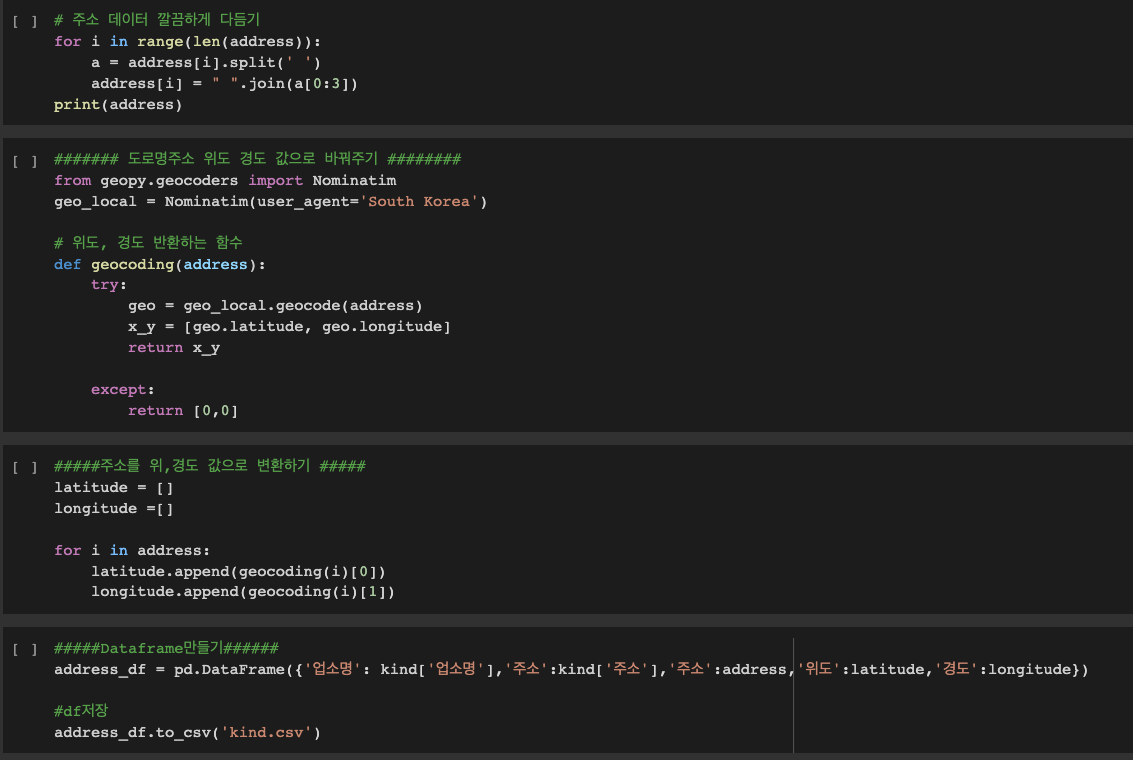

### 새로 만든 파일 다시 불러오기

In [ ]:
kind_1 = pd.read_csv("data/착한업소.csv").drop("Unnamed: 0", axis = 1)
kind_1

## 도서관

In [1]:
from dbfread import DBF
library = DBF('data/TL_LBRRY_2019.dbf')
library = pd.DataFrame(library)

ModuleNotFoundError: ignored

In [ ]:
library

In [ ]:
# 필요한 컬럼만 뽑아오기
library = library[['LBRRY_NM', 'SIG_NM', 'tm_x', 'tm_y']]
library

In [ ]:
library_xy = library[["tm_x", "tm_y"]]
library_xy.head(5)

In [ ]:
coord = np.array(library_xy)

# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [ ]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]


In [ ]:
library_xy["위도"] = result_imt[:, 1]
library_xy["경도"] = result_imt[:, 0]

In [ ]:
#위도, 경도로 바꿔주어 새 컬럼값으로 넣어줌
library_xy

library_xy = np.array(library_xy[['위도', '경도']])
library_xy

In [ ]:
# 바꾼 위경도 새 컬럼으로 넣어주기
library["위도"] = result_imt[:, 1]
library["경도"] = result_imt[:, 0]
library

In [ ]:
# 전처리 끝
library = library[['LBRRY_NM', 'SIG_NM', '위도', '경도']]
library

In [ ]:
# 전처리 완료한 데이터 다운로드
#library.to_csv("도서관.csv")

## 전월세

In [ ]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [ ]:
df = pd.read_csv("data/서울특별시_전월세가_2021.txt", sep=',', encoding='cp949')
df

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2021,11170,용산구,11300,원효로2가,1.0,대지,1.0,0.0,6.0,20210317,월세,21.45,500,33,\t(1)\t,1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
1,2021,11170,용산구,11300,원효로2가,1.0,대지,1.0,0.0,6.0,20210406,전세,21.45,12000,0,\t(1)\t,1990.0,오피스텔,NaN,NaN,NaN,NaN,NaN
2,2021,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,5.0,20201202,월세,33.66,10000,55,\t(1-1)\t,1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
3,2021,11440,마포구,11000,노고산동,1.0,대지,1.0,1.0,9.0,20210201,전세,33.66,11000,0,\t(1-1)\t,1998.0,오피스텔,NaN,NaN,NaN,NaN,NaN
4,2021,11545,금천구,10200,독산동,1.0,대지,1006.0,54.0,2.0,20210302,월세,17.67,500,50,\t(1006-54)\t,2014.0,오피스텔,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524670,2021,11305,강북구,10100,미아동,NaN,NaN,NaN,NaN,NaN,20210731,월세,249.00,4000,120,NaN,1970.0,단독다가구,21.07~23.07,신규,NaN,NaN,NaN
524671,2021,11260,중랑구,10400,묵동,NaN,NaN,NaN,NaN,NaN,20210614,전세,249.67,17000,0,NaN,2019.0,단독다가구,21.07~23.07,신규,NaN,NaN,NaN
524672,2021,11590,동작구,10700,사당동,NaN,NaN,NaN,NaN,NaN,20210701,월세,249.67,5000,60,NaN,NaN,단독다가구,NaN,NaN,NaN,NaN,NaN
524673,2021,11620,관악구,10200,신림동,NaN,NaN,NaN,NaN,NaN,20211129,전세,249.69,26000,0,NaN,1987.0,단독다가구,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['자치구코드', '자치구명', '법정동코드', '법정동명', '전월세구분', '보증금(만원)', '임대료(만원)']]
df

,자치구코드,자치구명,법정동코드,법정동명,전월세구분,보증금(만원),임대료(만원)
0,11170,용산구,11300,원효로2가,월세,500,33
1,11170,용산구,11300,원효로2가,전세,12000,0
2,11440,마포구,11000,노고산동,월세,10000,55
3,11440,마포구,11000,노고산동,전세,11000,0
4,11545,금천구,10200,독산동,월세,500,50
...,...,...,...,...,...,...,...
524670,11305,강북구,10100,미아동,월세,4000,120
524671,11260,중랑구,10400,묵동,전세,17000,0
524672,11590,동작구,10700,사당동,월세,5000,60
524673,11620,관악구,10200,신림동,전세,26000,0


In [ ]:
# 전처리 완료
#df.to_csv('전월세.csv')

## 물가

In [ ]:
import re
a = pd.read_excel("data/서울시 대형마트.xlsx")
b = pd.read_excel("data/서울시 전통시장물가.xlsx")

In [ ]:
for i in range(len(a)):
  a["품목"][i] = re.sub('\([^)]*\)',"", a["품목"][i]) # 괄호 안 내용 제거
a = a.iloc[:,[0,2,5]]
a.head()

,품목,가격,구
0,사과,1245.0,용산
1,배,2725.0,용산
2,배추,7480.0,용산
3,무,3100.0,용산
4,양파,4150.0,용산


In [ ]:
for i in range(len(b)):
  b["품목"][i] = re.sub('\([^)]*\)',"", b["품목"][i])
b = b.iloc[:,[0,2,5]]
b.head()

,품목,가격,구
0,사과,2000,종로
1,배,4000,종로
2,배추,12000,종로
3,무,4000,종로
4,양파,4500,종로


In [ ]:
ab = a.merge(b, on=['품목','구'], how='left') # 병합 
ab.rename(columns = {'가격_x':'가격_대형마트','가격_y':'가격_전통시장'},inplace=True) # 속성이름변경
ab = ab[['구','품목','가격_대형마트','가격_전통시장']] # 속성재배치
ab

,구,품목,가격_대형마트,가격_전통시장
0,용산,사과,1245.0,1500.0
1,용산,배,2725.0,3000.0
2,용산,배추,7480.0,10000.0
3,용산,무,3100.0,4000.0
4,용산,양파,4150.0,3500.0
...,...,...,...,...
777,동작,달걀,6480.0,7000.0
778,동작,조기,2880.0,2000.0
779,동작,명태,5980.0,3000.0
780,동작,오징어,3780.0,4000.0


In [ ]:
# 전처리 완료한 데이터 다운로드
#ab.to_csv("물가.csv")